In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Loading Data sets 

In [2]:
columns = ['HCHO_reading','Location','Current_date','Next_date']
file1 = pd.read_csv('col_mat_nuw_output.csv', sep=",", header=None, names = columns, engine = 'python')
file2 = pd.read_csv('kan_output.csv', sep=",", header=None, names = columns, engine = 'python')
file3 = pd.read_csv('mon_kur_jaf_output.csv', sep=",", header=None, names = columns, engine = 'python')
Hcho_reading = pd.concat([file1,file2,file3], ignore_index=True)
print(Hcho_reading)

       HCHO_reading        Location Current_date   Next_date
0          0.000197  Colombo Proper   2019-01-01  2019-01-02
1          0.000263  Colombo Proper   2019-01-02  2019-01-03
2          0.000099  Colombo Proper   2019-01-03  2019-01-04
3          0.000210  Colombo Proper   2019-01-04  2019-01-05
4          0.000179  Colombo Proper   2019-01-05  2019-01-06
...             ...             ...          ...         ...
12777           NaN   Jaffna Proper   2023-12-27  2023-12-28
12778      0.000051   Jaffna Proper   2023-12-28  2023-12-29
12779      0.000127   Jaffna Proper   2023-12-29  2023-12-30
12780      0.000117   Jaffna Proper   2023-12-30  2023-12-31
12781      0.000065   Jaffna Proper   2023-12-31  2024-01-01

[12782 rows x 4 columns]


In [3]:
#converting the location names 
location_new = {
    'Colombo Proper': 'Colombo',
    'Bibile, Monaragala': 'Monaragala',
    'Deniyaya, Matara': 'Matara',
    'Jaffna Proper':'Jaffna',
    'Kandy Proper' :'Kandy',
    'Kurunegala Proper' :'Kurunegala',
    'Nuwara Eliya Proper':'Nuwara Eliya'
    
    
    # Add more mappings as needed
}
Hcho_reading['Location'] = Hcho_reading['Location'].replace(location_new)


In [4]:
Hcho_reading.head()

,HCHO_reading,Location,Current_date,Next_date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06


In [5]:
Hcho_reading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12782 entries, 0 to 12781
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO_reading  7918 non-null   float64
 1   Location      12782 non-null  object 
 2   Current_date  12782 non-null  object 
 3   Next_date     12782 non-null  object 
dtypes: float64(1), object(3)
memory usage: 399.6+ KB


In [6]:
Hcho_reading.describe()

,HCHO_reading
count,7918.000000
mean,0.000119
std,0.000093
min,-0.000352
25%,0.000061
50%,0.000112
75%,0.000172
max,0.000900


In [7]:
#duplicates
Hcho_reading['Current_date']=pd.to_datetime(Hcho_reading['Current_date'])
duplicate_entries = Hcho_reading[Hcho_reading.duplicated(subset=['Current_date', 'Location'], keep=False)]

if duplicate_entries.empty:
    print("No duplicate entries found.")
else:
    print("Duplicate entries found:")
    print(duplicate_entries)

No duplicate entries found.


In [8]:
#checking for null values
null_values = Hcho_reading.groupby('Location').apply(lambda x: x.isnull().sum())

print("Null values in the dataset grouped by location:")
print(null_values)

Null values in the dataset grouped by location:
              HCHO_reading  Location  Current_date  Next_date
Location                                                     
Colombo                487         0             0          0
Jaffna                 365         0             0          0
Kandy                  793         0             0          0
Kurunegala             592         0             0          0
Matara                 847         0             0          0
Monaragala             695         0             0          0
Nuwara Eliya          1085         0             0          0


In [9]:
Hcho_reading['Month'] = Hcho_reading['Current_date'].dt.month
Hcho_reading['Year'] = Hcho_reading['Current_date'].dt.year

# Group by location, year, and month, and  calculating  the mean HCHO reading for each location for each month
mean_hcho_by_location_month = Hcho_reading.groupby(['Location', 'Year', 'Month'])['HCHO_reading'].mean()

 # Merging in the data frame to fill the null values
Hcho_reading = pd.merge(Hcho_reading,mean_hcho_by_location_month,on=['Location','Year','Month'],how='left')

# Filling  null values in 'HCHO_reading' column with the respective mean
Hcho_reading['HCHO_reading_x'].fillna(Hcho_reading['HCHO_reading_y'], inplace=True)

# Drop redundant columns
Hcho_reading.drop(['HCHO_reading_y','Month','Year'], axis=1, inplace=True)

# Rename column to 'HCHO_reading'
Hcho_reading.rename(columns={'HCHO_reading_x': 'HCHO_reading'}, inplace=True)
Hcho_reading

,HCHO_reading,Location,Current_date,Next_date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
12777,0.000075,Jaffna,2023-12-27,2023-12-28
12778,0.000051,Jaffna,2023-12-28,2023-12-29
12779,0.000127,Jaffna,2023-12-29,2023-12-30
12780,0.000117,Jaffna,2023-12-30,2023-12-31


In [10]:
#rechecking
null_values = Hcho_reading.groupby('Location').apply(lambda x: x.isnull().sum())

print("Null values in the dataset grouped by location:")
print(null_values)

Null values in the dataset grouped by location:
              HCHO_reading  Location  Current_date  Next_date
Location                                                     
Colombo                  0         0             0          0
Jaffna                   0         0             0          0
Kandy                    0         0             0          0
Kurunegala               0         0             0          0
Matara                   0         0             0          0
Monaragala               0         0             0          0
Nuwara Eliya             0         0             0          0


In [11]:
#converting the negative values to null
Hcho_reading.loc[Hcho_reading['HCHO_reading'] < 0, 'HCHO_reading'] = np.nan
Hcho_reading['Month'] = Hcho_reading['Current_date'].dt.month
Hcho_reading['Year'] = Hcho_reading['Current_date'].dt.year

# Group by location, year, and month, and  calculating  the mean HCHO reading for each location for each month
mean_hcho_by_location_month = Hcho_reading.groupby(['Location', 'Year', 'Month'])['HCHO_reading'].mean()

 # Merging in the data frame to fill the null values
Hcho_reading = pd.merge(Hcho_reading,mean_hcho_by_location_month,on=['Location','Year','Month'],how='left')
# Filling  null values in 'HCHO_reading' column with the respective mean
Hcho_reading['HCHO_reading_x'].fillna(Hcho_reading['HCHO_reading_y'], inplace=True)

# Drop redundant columns
Hcho_reading.drop(['HCHO_reading_y'], axis=1, inplace=True)

# Rename column to 'HCHO_reading'
Hcho_reading.rename(columns={'HCHO_reading_x': 'HCHO_reading'}, inplace=True)
Hcho_reading


,HCHO_reading,Location,Current_date,Next_date,Month,Year
0,0.000197,Colombo,2019-01-01,2019-01-02,1,2019
1,0.000263,Colombo,2019-01-02,2019-01-03,1,2019
2,0.000099,Colombo,2019-01-03,2019-01-04,1,2019
3,0.000210,Colombo,2019-01-04,2019-01-05,1,2019
4,0.000179,Colombo,2019-01-05,2019-01-06,1,2019
...,...,...,...,...,...,...
12777,0.000075,Jaffna,2023-12-27,2023-12-28,12,2023
12778,0.000051,Jaffna,2023-12-28,2023-12-29,12,2023
12779,0.000127,Jaffna,2023-12-29,2023-12-30,12,2023
12780,0.000117,Jaffna,2023-12-30,2023-12-31,12,2023


In [12]:
mean_hcho_by_location_month

Location      Year  Month
Colombo       2019  1        0.000201
                    2        0.000245
                    3        0.000255
                    4        0.000196
                    5        0.000131
                               ...   
Nuwara Eliya  2023  8        0.000088
                    9        0.000099
                    10       0.000053
                    11       0.000060
                    12       0.000050
Name: HCHO_reading, Length: 420, dtype: float64

## Mean, Median, and Standard deviation of HCHO levels 

In [13]:
#  overall 
overall_stats = Hcho_reading['HCHO_reading'].agg(['mean', 'median', 'std'])
print(overall_stats)

mean      0.000119
median    0.000105
std       0.000069
Name: HCHO_reading, dtype: float64


In [14]:
# city wise from 2019 to 2024
city_stats = Hcho_reading.groupby('Location')['HCHO_reading'].agg(['mean', 'median', 'std'])
print(city_stats)

                  mean    median       std
Location                                  
Colombo       0.000159  0.000145  0.000082
Jaffna        0.000112  0.000101  0.000064
Kandy         0.000111  0.000098  0.000061
Kurunegala    0.000134  0.000118  0.000068
Matara        0.000098  0.000084  0.000065
Monaragala    0.000129  0.000126  0.000068
Nuwara Eliya  0.000090  0.000083  0.000049


In [15]:
# Annual city wise
Hcho_reading['Year'] = Hcho_reading['Current_date'].dt.year

anual_stats = Hcho_reading.groupby(['Location', 'Year'])['HCHO_reading'].agg(['mean', 'median', 'std'])
print(anual_stats)

                       mean    median       std
Location     Year                              
Colombo      2019  0.000160  0.000145  0.000084
             2020  0.000159  0.000139  0.000087
             2021  0.000157  0.000141  0.000084
             2022  0.000156  0.000145  0.000079
             2023  0.000162  0.000148  0.000078
Jaffna       2019  0.000116  0.000110  0.000062
             2020  0.000112  0.000104  0.000062
             2021  0.000107  0.000097  0.000066
             2022  0.000111  0.000100  0.000066
             2023  0.000115  0.000104  0.000066
Kandy        2019  0.000118  0.000099  0.000066
             2020  0.000122  0.000098  0.000075
             2021  0.000095  0.000091  0.000051
             2022  0.000111  0.000105  0.000049
             2023  0.000108  0.000104  0.000056
Kurunegala   2019  0.000140  0.000118  0.000072
             2020  0.000139  0.000124  0.000074
             2021  0.000127  0.000111  0.000063
             2022  0.000135  0.000122  0

In [16]:

# output_directory = "C:\\Users\\admin\\Desktop\\L5\\Data_Engineering\\20221585\\"


# Loop through each unique location
for location in Hcho_reading['Location'].unique():
    # Subset the DataFrame for the current location
    location_data = Hcho_reading[Hcho_reading['Location'] == location]
    
    # Define the file path for the CSV file
    # file_path = output_directory + f"{location}_Hcho_Reading.csv"
    
    # Save the subset DataFrame to a CSV file
    # location_data.to_csv(file_path, index=False)

    # print(f"Saved data for {location} to {file_path}")
    location_data.to_csv(f"{location}_Hcho_Reading.csv", index=False)



In [17]:
Hcho_reading.to_csv("Merged_HCHO_Reading.csv")

## Visualization

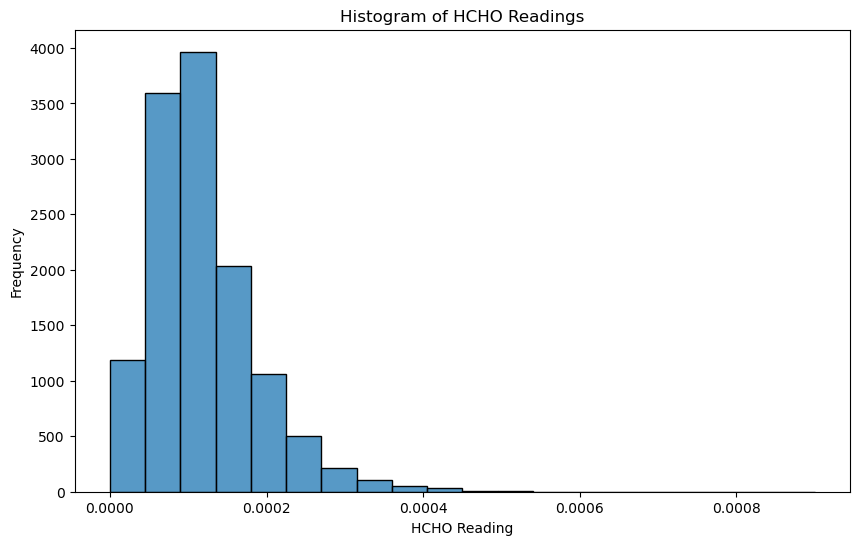

In [18]:

plt.figure(figsize=(10, 6))
sns.histplot(Hcho_reading['HCHO_reading'], bins=20)
plt.title('Histogram of HCHO Readings')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.show()

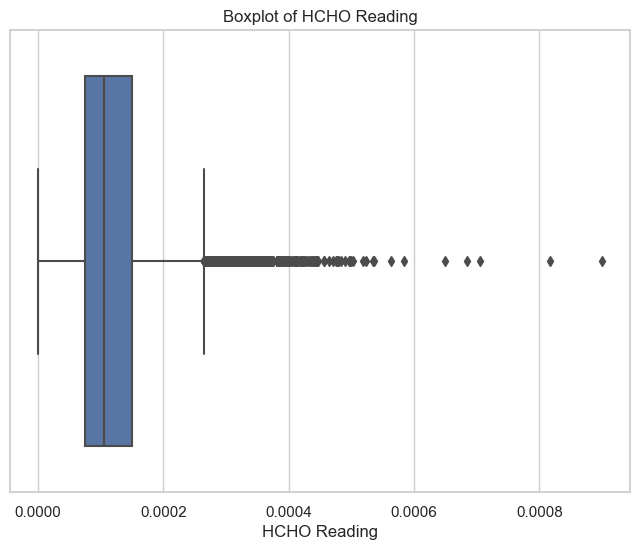

In [19]:

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=Hcho_reading, x='HCHO_reading')
plt.title('Boxplot of HCHO Reading')
plt.xlabel('HCHO Reading')

plt.show()



C:\Users\admin\AppData\Local\Temp\ipykernel_15128\728211736.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Hcho_reading[Hcho_reading['Location'] == location]['HCHO_reading'], shade=True)


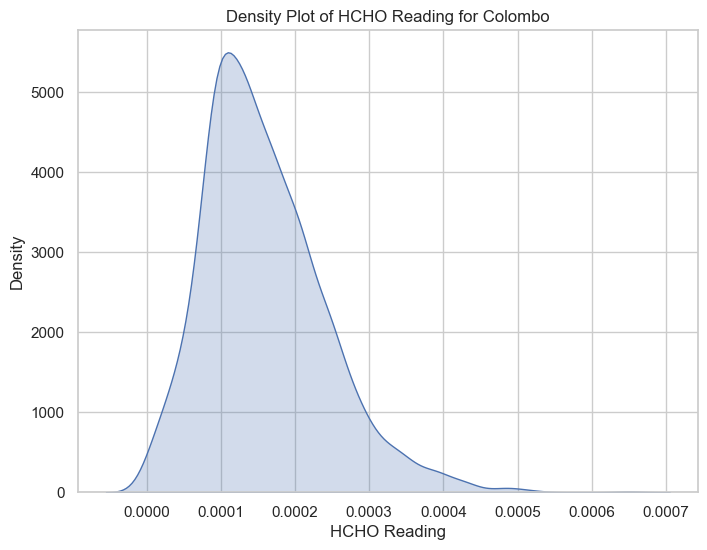

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\728211736.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Hcho_reading[Hcho_reading['Location'] == location]['HCHO_reading'], shade=True)


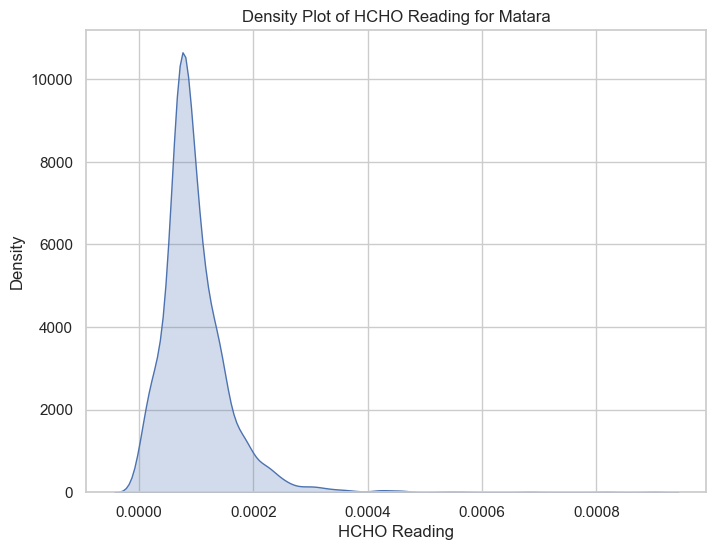

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\728211736.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Hcho_reading[Hcho_reading['Location'] == location]['HCHO_reading'], shade=True)


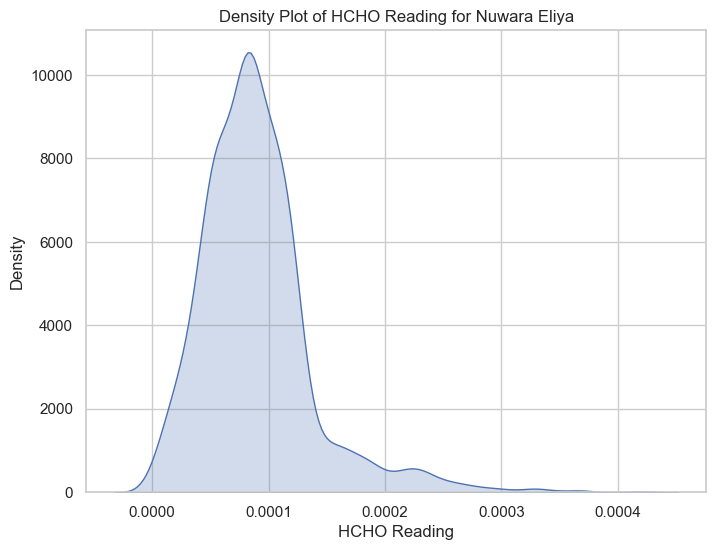

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\728211736.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Hcho_reading[Hcho_reading['Location'] == location]['HCHO_reading'], shade=True)


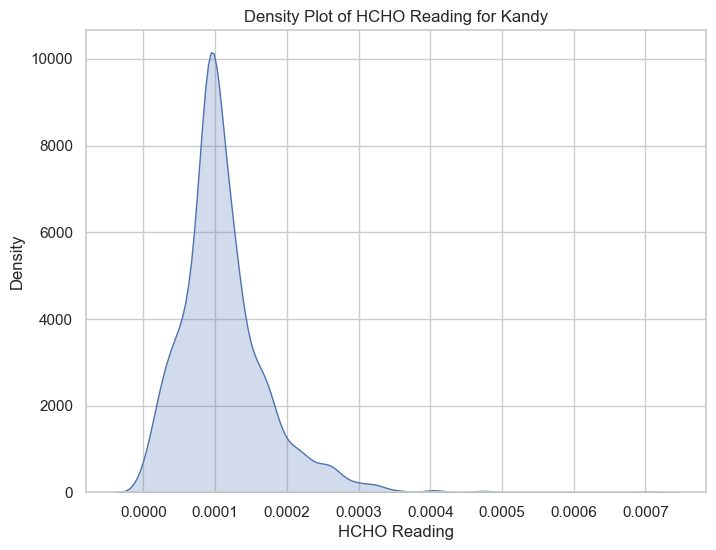

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\728211736.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Hcho_reading[Hcho_reading['Location'] == location]['HCHO_reading'], shade=True)


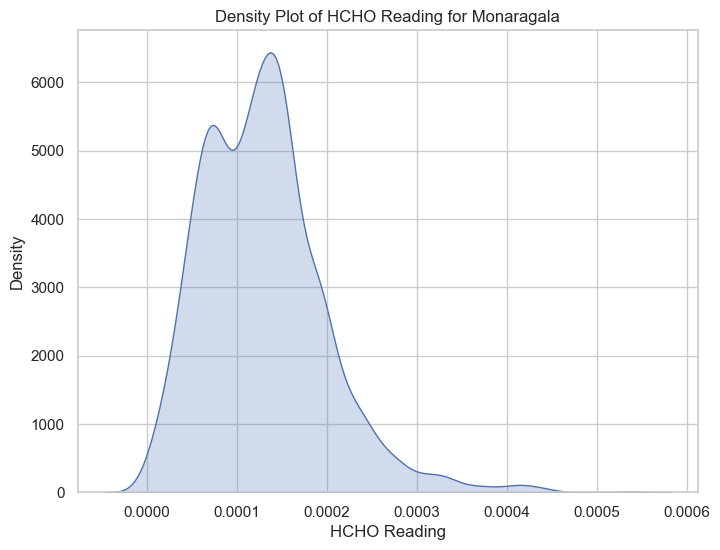

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\728211736.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Hcho_reading[Hcho_reading['Location'] == location]['HCHO_reading'], shade=True)


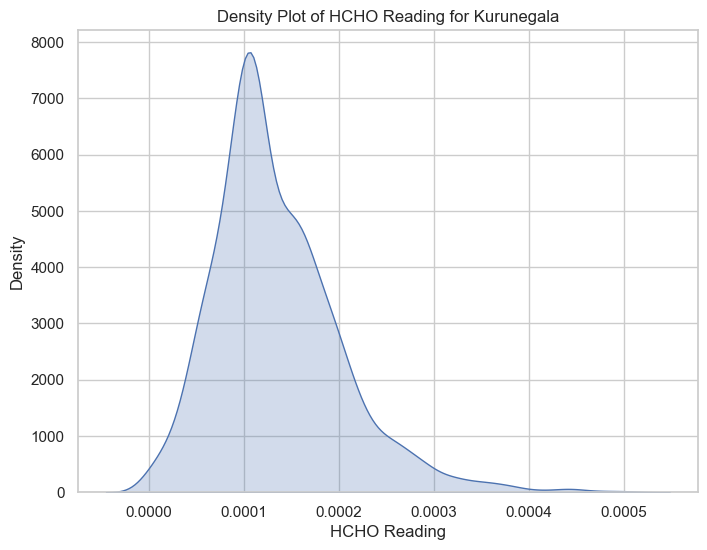

C:\Users\admin\AppData\Local\Temp\ipykernel_15128\728211736.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Hcho_reading[Hcho_reading['Location'] == location]['HCHO_reading'], shade=True)


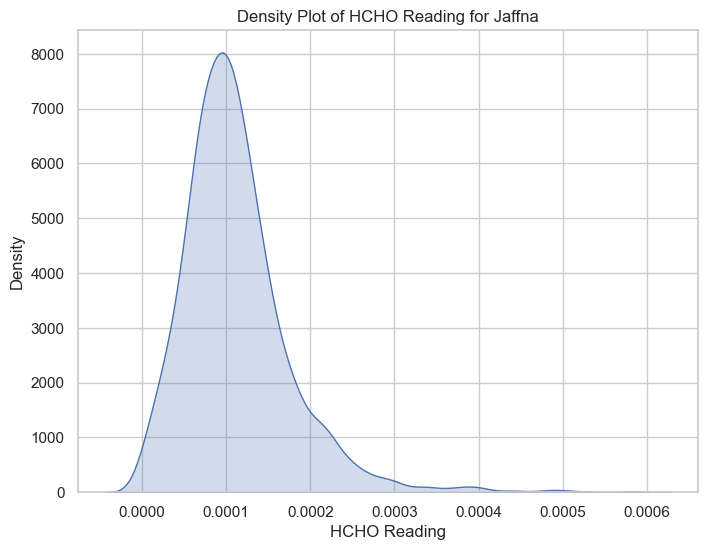

In [20]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create separate density plots for each location
for location in Hcho_reading['Location'].unique():
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=Hcho_reading[Hcho_reading['Location'] == location]['HCHO_reading'], shade=True)
    plt.title(f'Density Plot of HCHO Reading for {location}')
    plt.xlabel('HCHO Reading')
    plt.ylabel('Density')
    plt.show()




## Spatio-Temporal Analysis

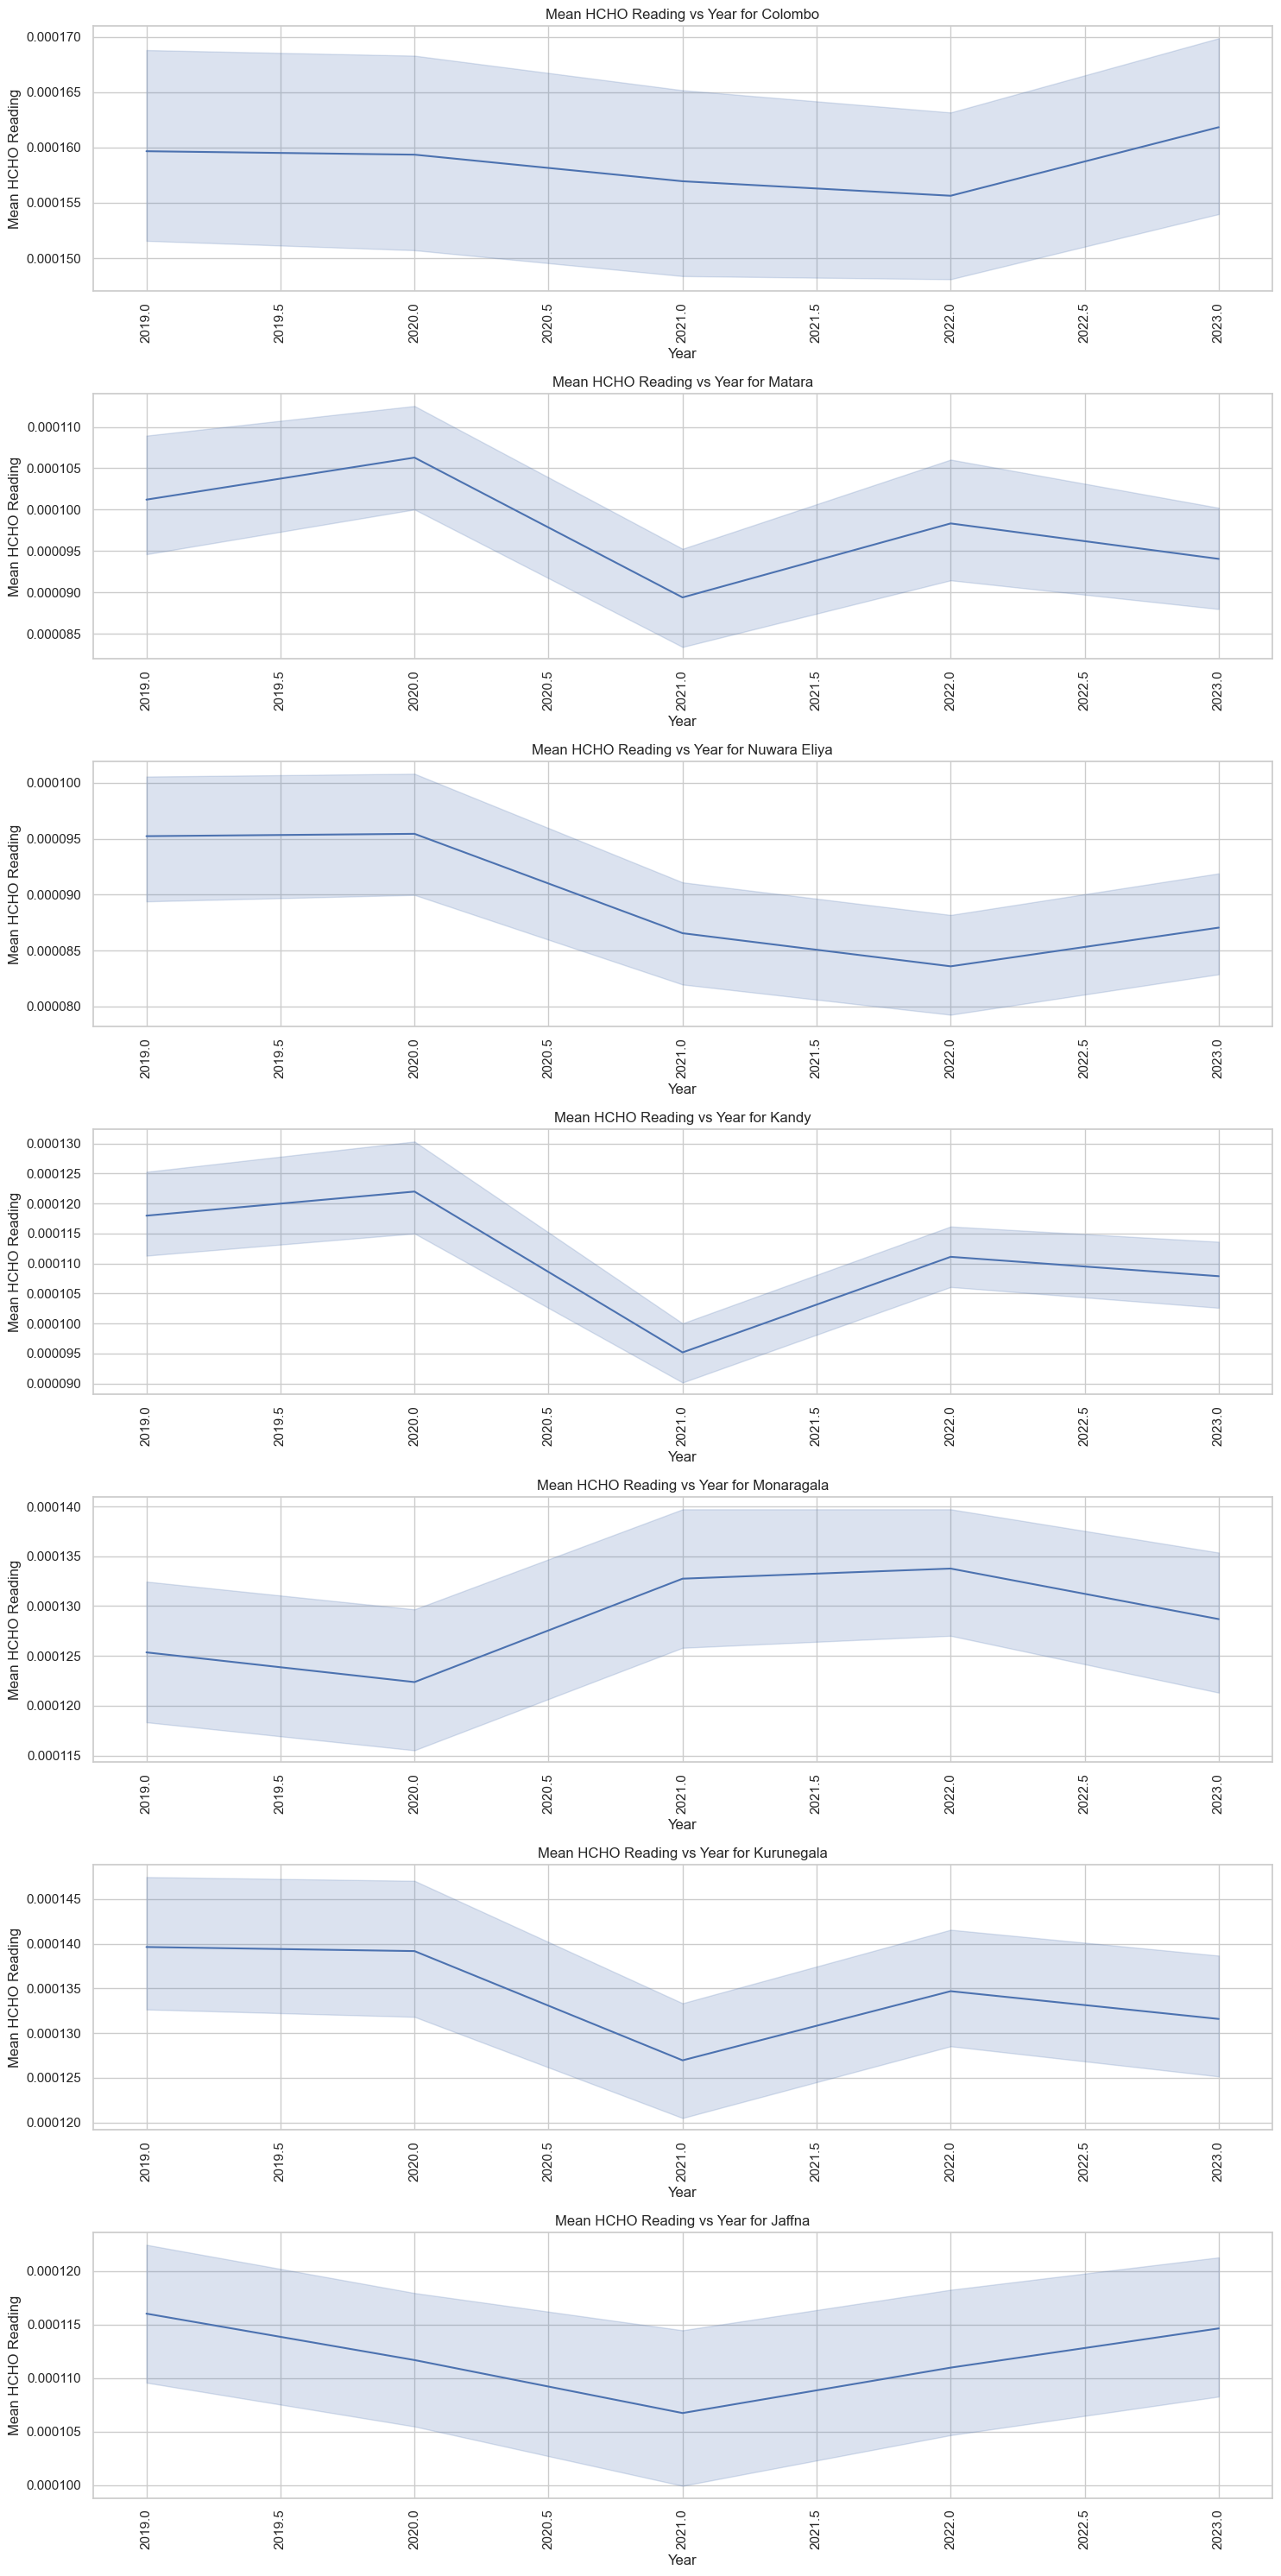

In [21]:
# Set up the figure and axes
fig, axes = plt.subplots(7, 1, figsize=(15, 30), )

# Iterate over unique locations
for i, location in enumerate(Hcho_reading['Location'].unique()):
    # Filter data for the current location
    location_data = Hcho_reading[Hcho_reading['Location'] == location]
    
    # Create line plot for the current location
    sns.lineplot(data=location_data, x='Year', y='HCHO_reading', ax=axes[i])
    
    # Set plot title and labels
    axes[i].set_title('Mean HCHO Reading vs Year for ' + location)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Mean HCHO Reading')
    axes[i].tick_params(axis='x', rotation=90)
    


plt.tight_layout()
plt.show()


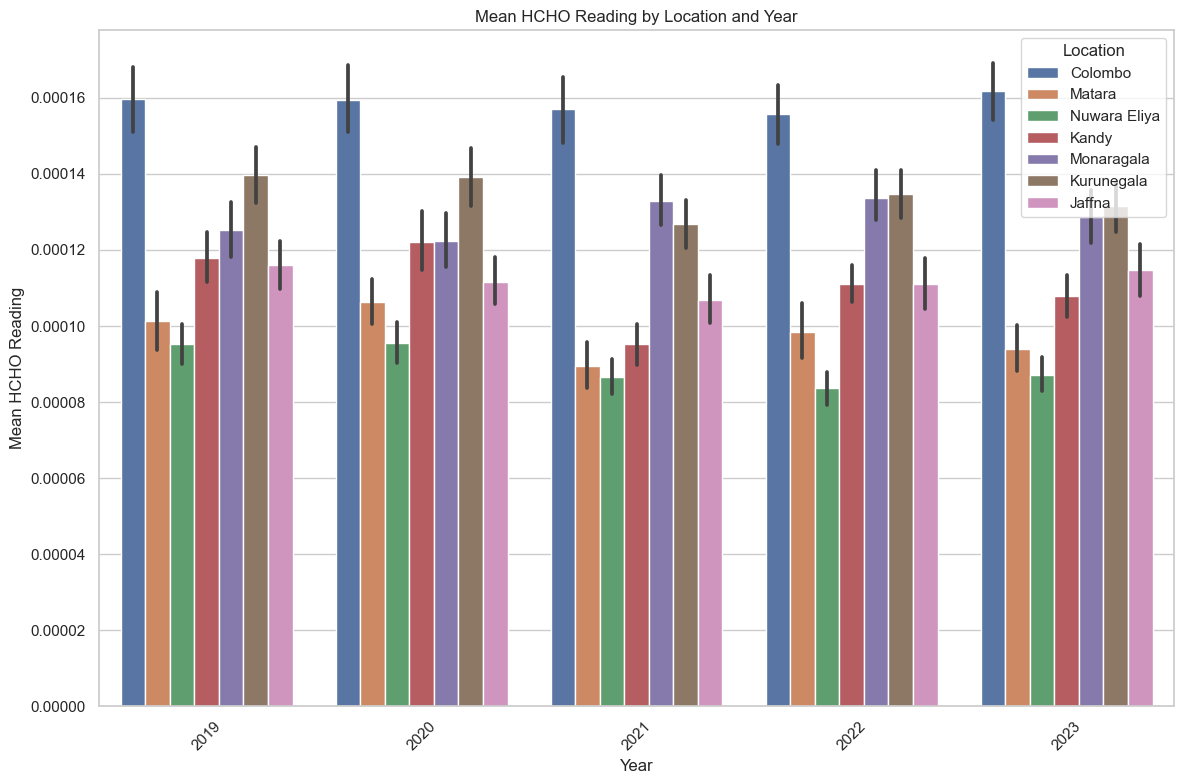

In [22]:
plt.figure(figsize=(12, 8))

# Create bar plot
sns.barplot(data=Hcho_reading, x='Year', y='HCHO_reading', hue='Location', estimator='mean')
plt.title('Mean HCHO Reading by Location and Year')
plt.xlabel('Year')
plt.ylabel('Mean HCHO Reading')
plt.xticks(rotation=45)
plt.legend(title='Location')

plt.tight_layout()
plt.show()

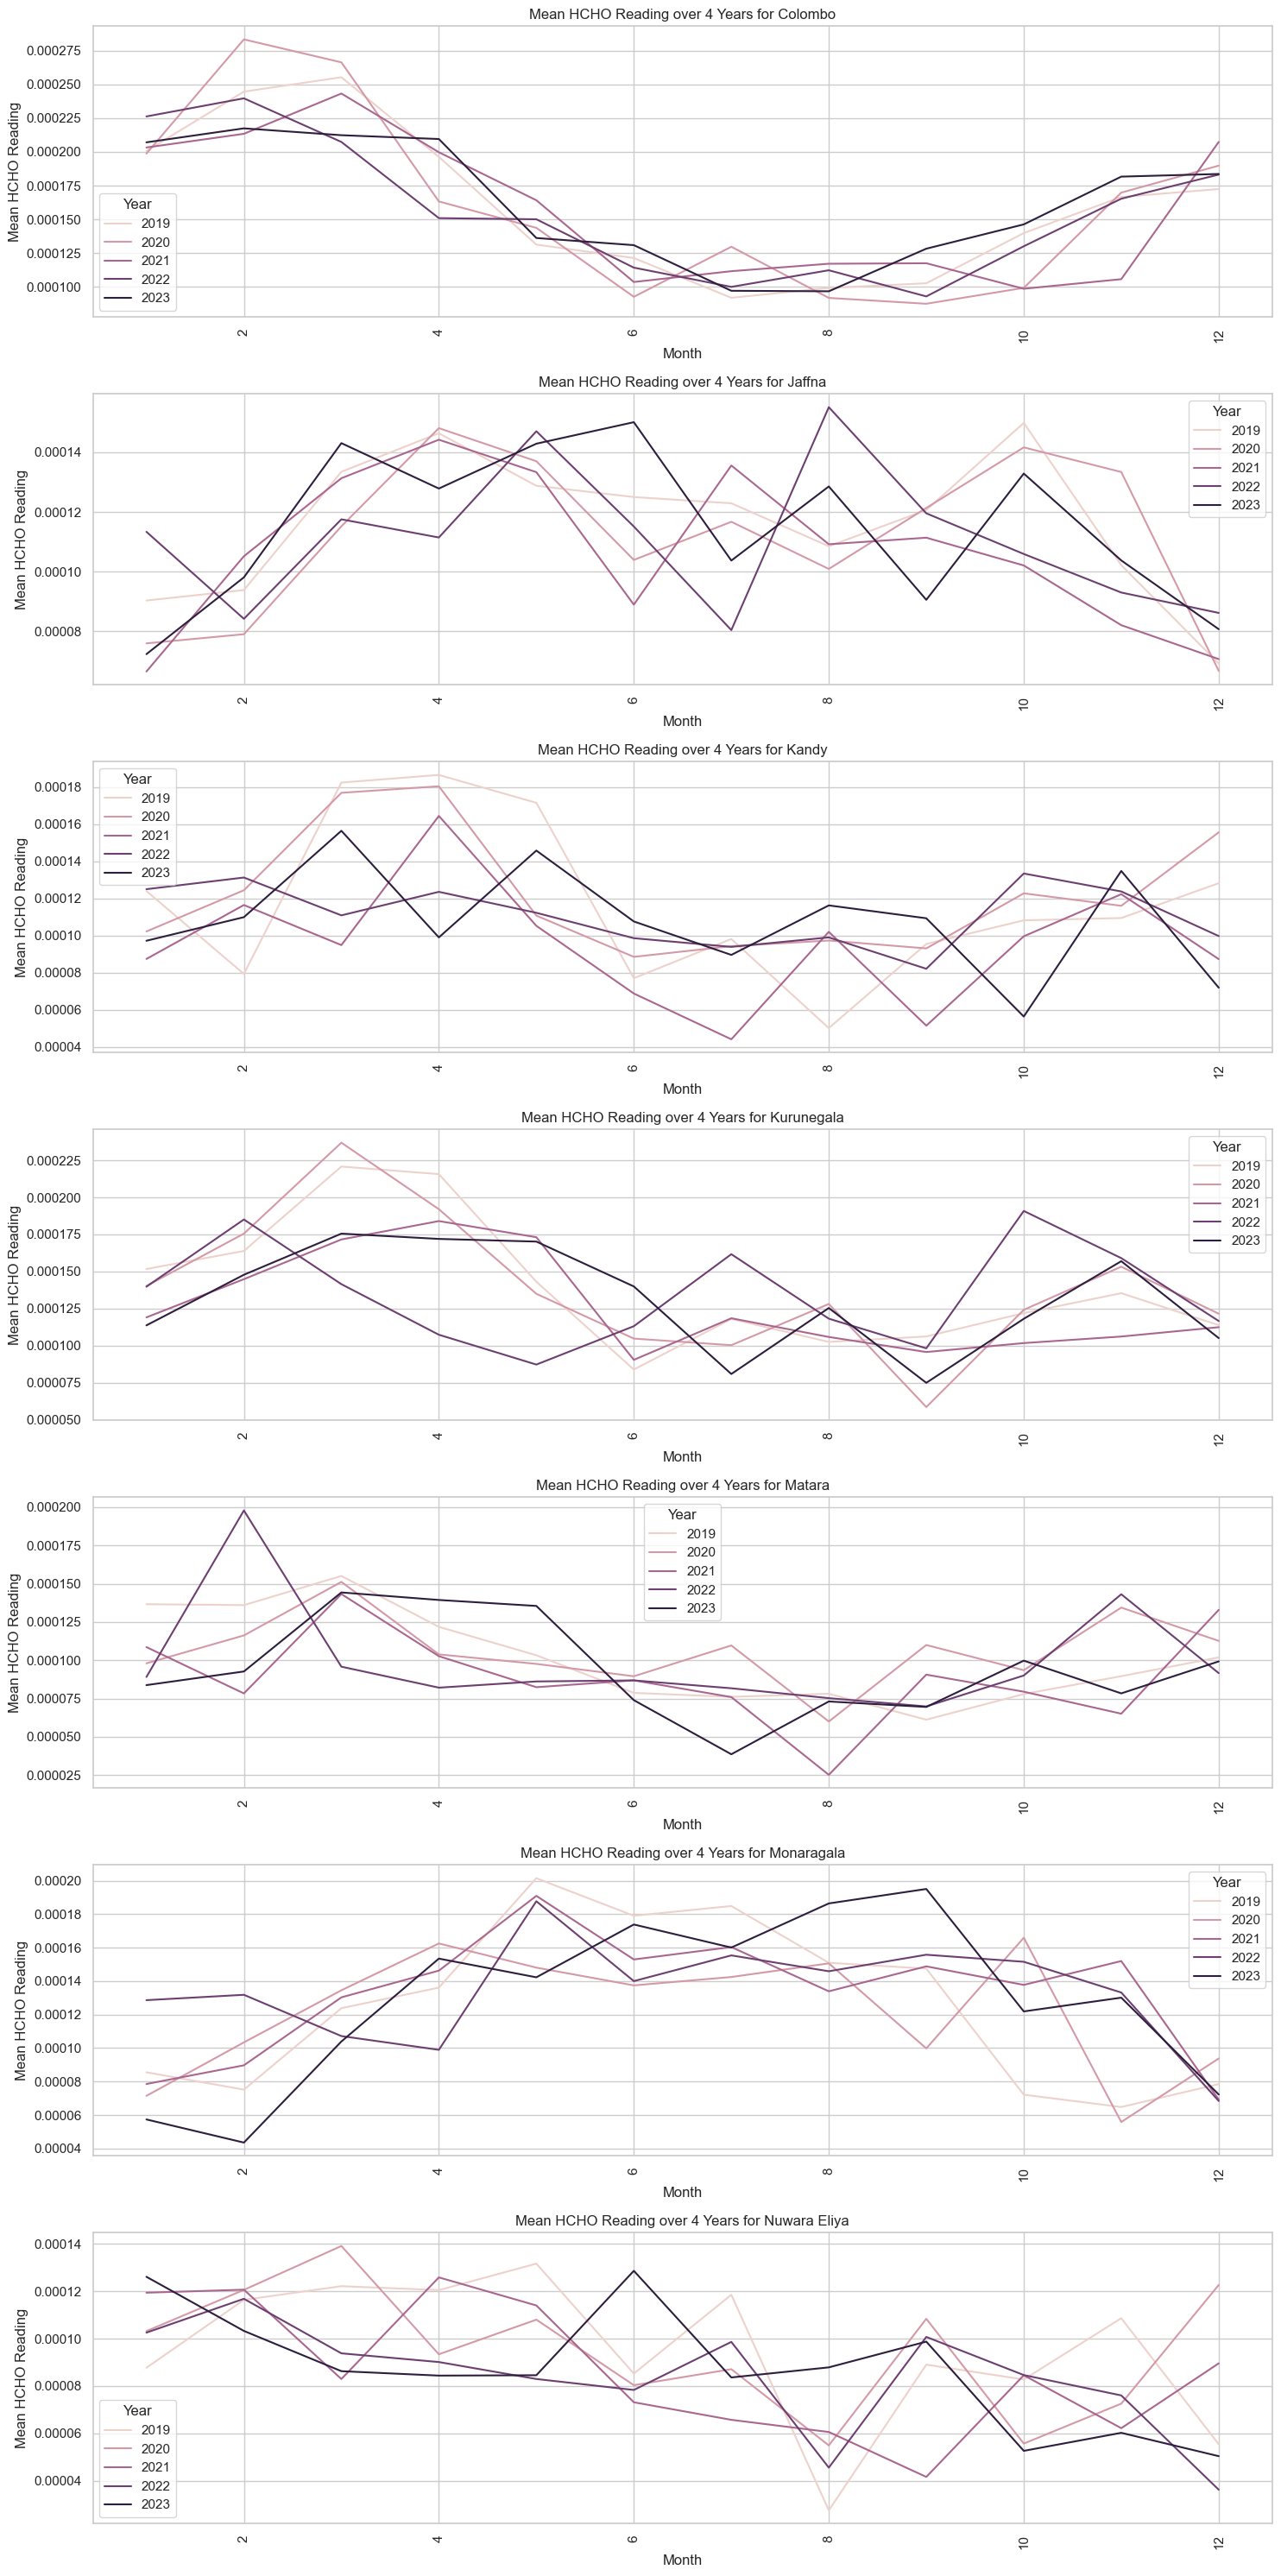

In [23]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=len(mean_hcho_by_location_month.index.levels[0].unique()), ncols=1, figsize=(15, 30))
# Iterate over each unique location and create a separate line plot for each
for i, location in enumerate(mean_hcho_by_location_month.index.levels[0].unique()):
    # Subset data for the current location
    location_data = mean_hcho_by_location_month.loc[location]
    
    # Create line plot for the current location
    sns.lineplot(data=location_data.reset_index(), x='Month', y='HCHO_reading', hue='Year', ax=axes[i])
    
    # Set title and labels for the current subplot
    axes[i].set_title(f'Mean HCHO Reading over 4 Years for {location}')
    axes[i].set_ylabel('Mean HCHO Reading')
    axes[i].legend(title='Year')
    axes[i].tick_params(axis='x', rotation=90)

# Set xlabel for all subplots
axes[-1].set_xlabel('Month')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



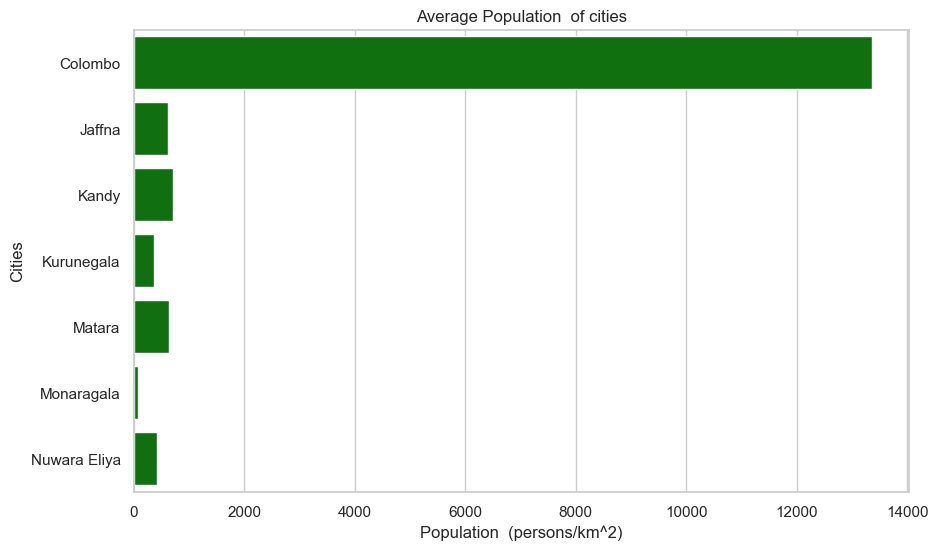

In [24]:
# plotting of the Average population  for each city
cities = ['Colombo', 'Jaffna', 'Kandy','Kurunegala','Matara','Monaragala','Nuwara Eliya' ]
population_density = [13364,611,710,362,630,80,420]

plt.figure(figsize=(10,6))
sns.barplot(x=population_density, y=cities, color='green')
plt.title("Average Population  of cities")
plt.ylabel("Cities")
plt.xlabel("Population  (persons/km^2)")
plt.show()

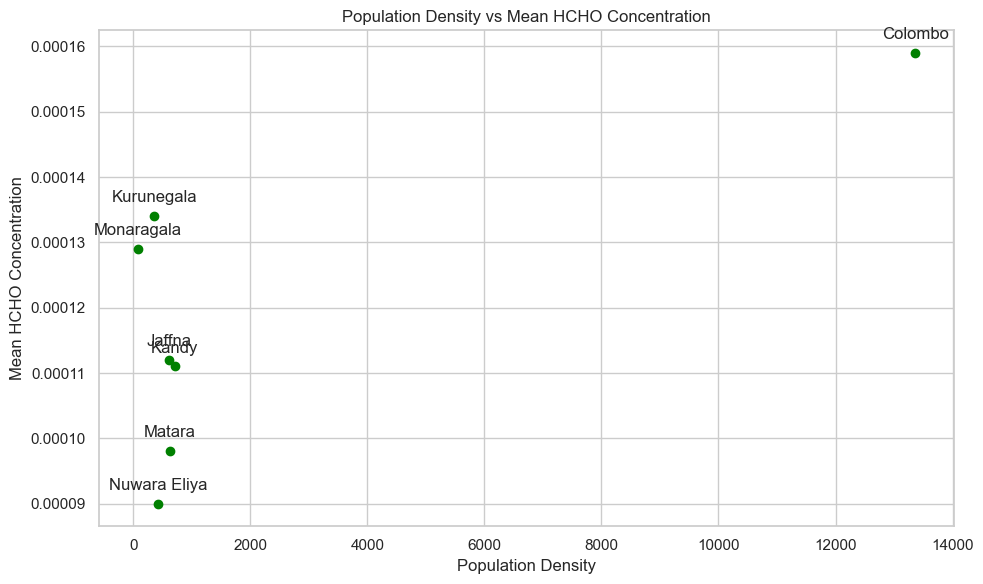

In [25]:
mean_hcho = [0.000159, 0.000112, 0.000111, 0.000134, 0.000098, 0.000129, 0.000090]


# plotting a line plot
plt.figure(figsize=(10,6))
plt.scatter(population_density, mean_hcho, marker='o', color='green')
# marking the name of the cities on the plot
for i, city in enumerate(cities):
    plt.annotate(city, (population_density[i], mean_hcho[i]), textcoords='offset points', xytext=(0,10), ha='center')
plt.title('Population Density vs Mean HCHO Concentration')
plt.xlabel('Population Density')
plt.ylabel('Mean HCHO Concentration')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
population_correlation = np.corrcoef(population_density, mean_hcho)
print('Correlation coefficient between population  and mean HCHO :', population_correlation[0,1])

Correlation coefficient between population  and mean HCHO : 0.7340445907011188


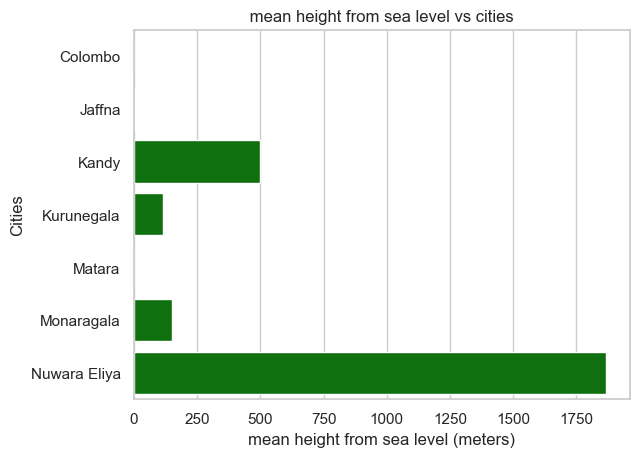

In [27]:
sea_level = [1,5,500,116,2,151,1868]
cities = ['Colombo','Jaffna','Kandy','Kurunegala','Matara','Monaragala','Nuwara Eliya' ]
sns.barplot(x=sea_level, y=cities, color='green')
plt.title(" mean height from sea level vs cities ")
plt.ylabel("Cities")
plt.xlabel("mean height from sea level (meters)")
plt.show()

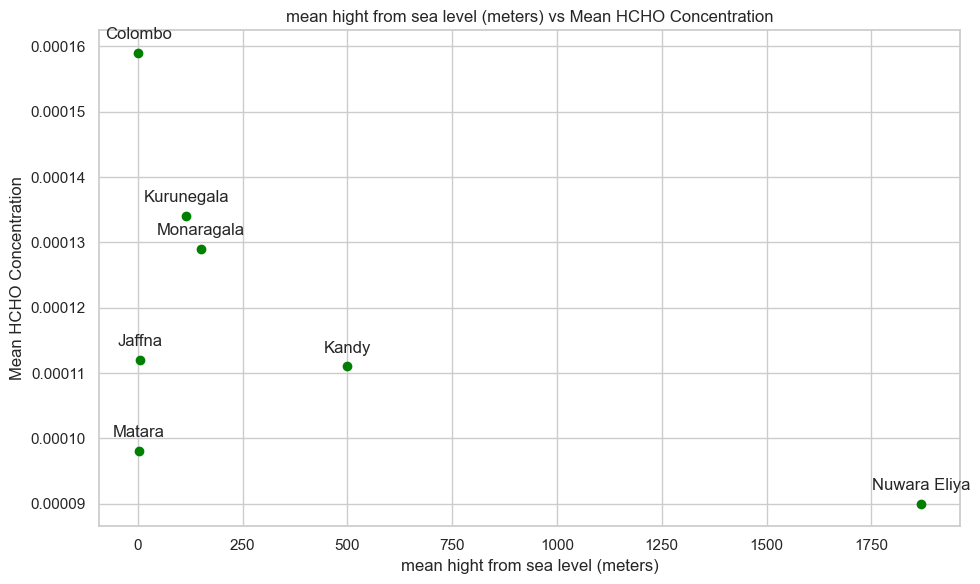

In [28]:

plt.figure(figsize=(10,6))
plt.scatter(sea_level, mean_hcho, marker='o', color='green')
# marking the name of the cities on the plot
for i, city in enumerate(cities):
    plt.annotate(city, (sea_level[i], mean_hcho[i]), textcoords='offset points', xytext=(0,10), ha='center')
plt.title('mean hight from sea level (meters) vs Mean HCHO Concentration')
plt.xlabel('mean hight from sea level (meters)')
plt.ylabel('Mean HCHO Concentration')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
sea_level_correlation = np.corrcoef(sea_level,mean_hcho)
print('Correlation coefficient between  Sea level  and mean HCHO :', sea_level_correlation[0,1])

Correlation coefficient between  Sea level  and mean HCHO : -0.5722951921145187


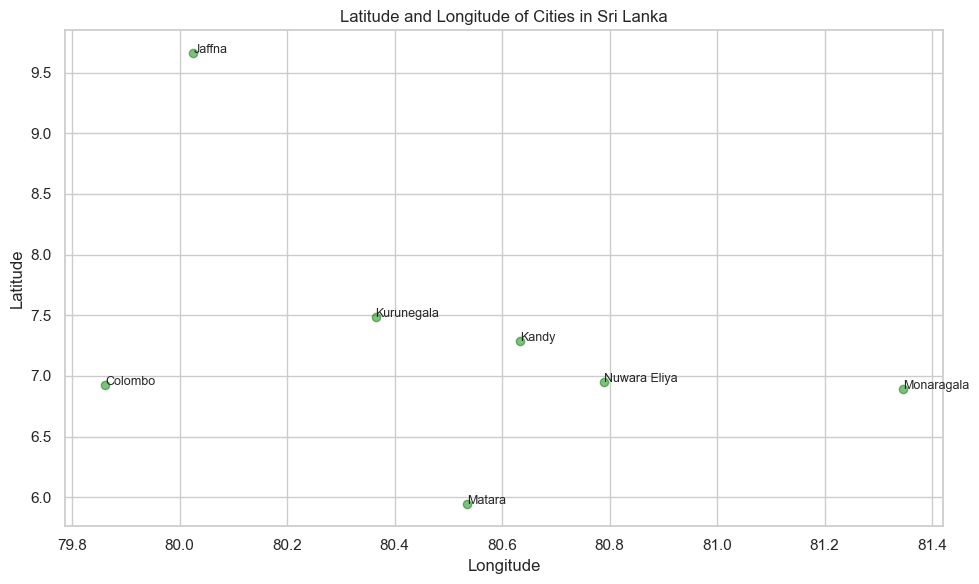

In [30]:
#https://www.latlong.net/


# Latitude and longitude coordinates for the cities
city_coordinates = {
    'Colombo': (6.9271, 79.8612),
    'Jaffna': (9.6615, 80.0255),
    'Kandy': (7.2906, 80.6337),
    'Kurunegala': (7.4866, 80.3647),
    'Matara': (5.9482, 80.5353),
    'Monaragala': (6.8906, 81.3458),
    'Nuwara Eliya': (6.9497, 80.7891)
}

# Extract latitude and longitude for plotting
cities = city_coordinates.keys()
latitudes = [coord[0] for coord in city_coordinates.values()]
longitudes = [coord[1] for coord in city_coordinates.values()]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, color='green', alpha=0.5)

# Add labels for each city
for city, lat, lon in zip(cities, latitudes, longitudes):
    plt.text(lon, lat, city, fontsize=9)

# Set plot title and labels
plt.title('Latitude and Longitude of Cities in Sri Lanka')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


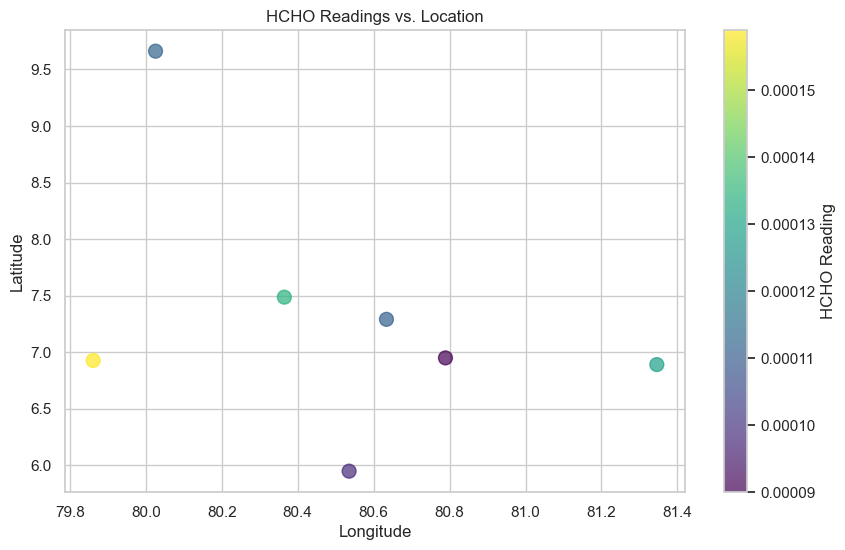

In [31]:

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c=mean_hcho, cmap='viridis', s=100, alpha=0.7)
plt.colorbar(label='HCHO Reading')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('HCHO Readings vs. Location')
plt.grid(True)
plt.show()


In [32]:

correlation_coefficient_longitude = np.corrcoef(longitudes, mean_hcho)[0, 1]
correlation_coefficient_latitude = np.corrcoef(latitudes, mean_hcho)[0, 1]

print("Correlation coefficient (Longitude, HCHO):", correlation_coefficient_longitude)
print("Correlation coefficient (Latitude, HCHO):", correlation_coefficient_latitude)

Correlation coefficient (Longitude, HCHO): -0.37223382865879134
Correlation coefficient (Latitude, HCHO): 0.036382580638737595


jaffna - 146.53 mm
colombo - 345.6
matara 101.94
mnuwara eliya 235.96
kandy   228.73
kurunegala - 159.47
monaragala -380.12


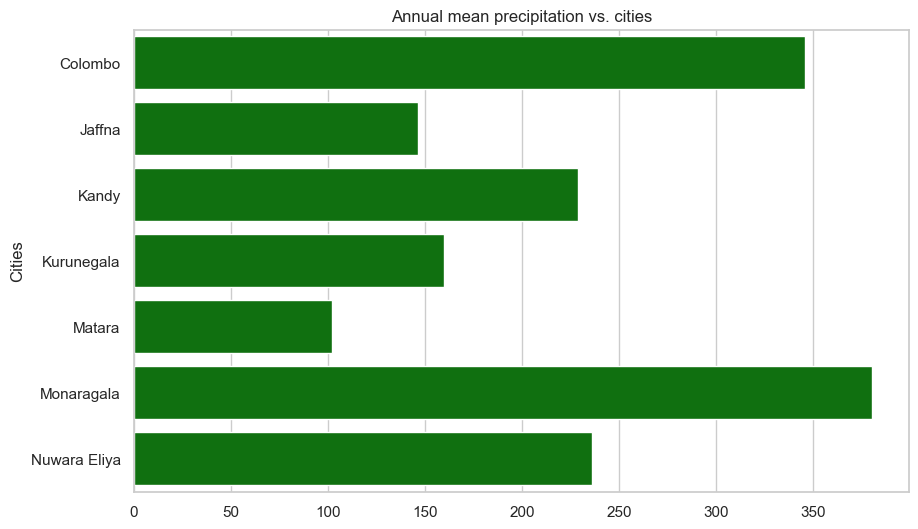

In [33]:
presipitation = [345.6,146.53,228.73,159.47,101.94,380.12,235.96]
cities = ['Colombo', 'Jaffna', 'Kandy','Kurunegala','Matara','Monaragala','Nuwara Eliya' ]

plt.figure(figsize=(10, 6))
sns.barplot(x=presipitation, y=cities, color='green')
plt.title("Annual mean precipitation vs. cities")
plt.ylabel("Cities")
plt.show()


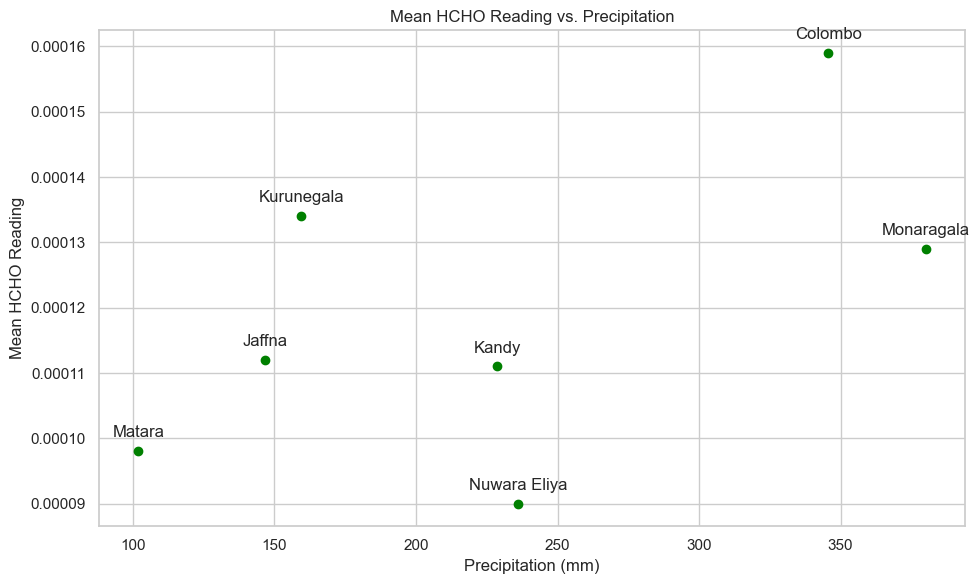

In [34]:
#https://www.google.com/amp/s/weatherandclimate.com/amp/sri-lanka/southern-sri-lanka/matara 

plt.figure(figsize=(10,6))
plt.scatter(presipitation, mean_hcho, marker='o', color='green')
# marking the name of the cities on the plot
for i, city in enumerate(cities):
    plt.annotate(city, (presipitation[i], mean_hcho[i]), textcoords='offset points', xytext=(0,10), ha='center')
plt.title('Mean HCHO Reading vs. Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Mean HCHO Reading')
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
Precipitation_correlation = np.corrcoef(presipitation,mean_hcho)
print('Correlation coefficient between precipitation  and mean HCHO :', Precipitation_correlation[0,1])

Correlation coefficient between precipitation  and mean HCHO : 0.559912471167323


colombo - 83.69
jaffana - 82.57
kandy  -  77.46
kurunegala - 78.76
matara - 80.16
monaragala - 82.12
nuwaraeliya - 79.91

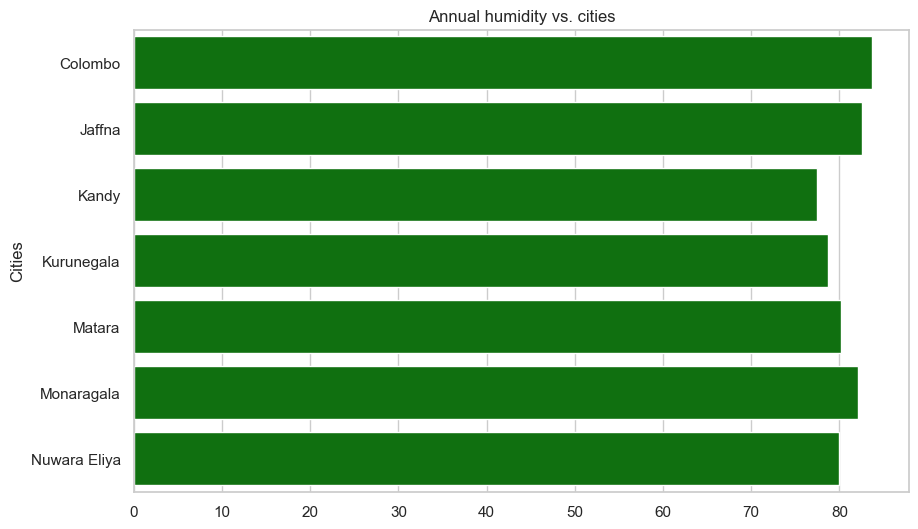

In [36]:
Humidity =  [83.69,82.57,77.46,78.76,80.16,82.12,79.91]
plt.figure(figsize=(10, 6))
sns.barplot(x=Humidity, y=cities, color='green')
plt.title("Annual humidity vs. cities")
plt.ylabel("Cities")
plt.show()

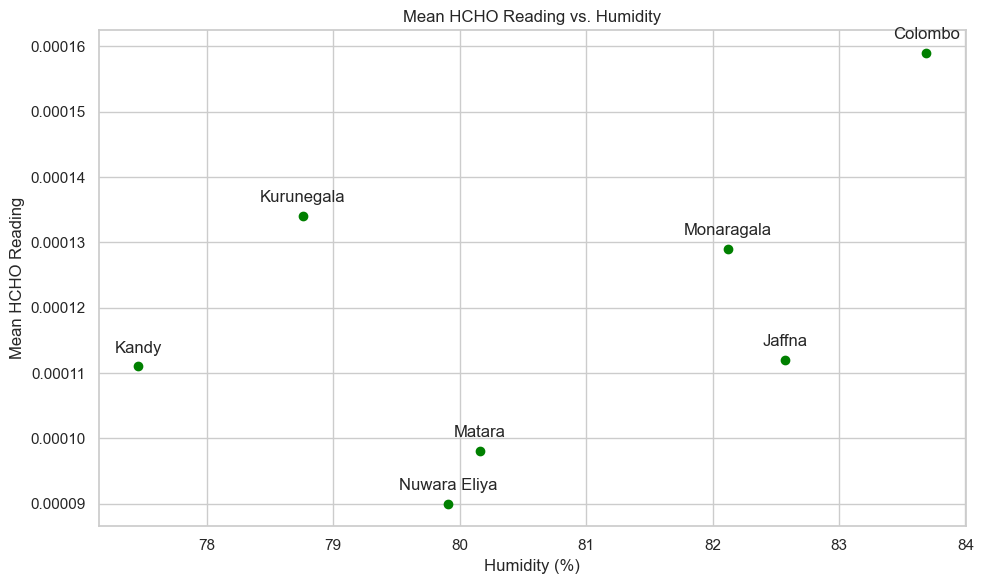

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(Humidity, mean_hcho, marker='o', color='green')
# marking the name of the cities on the plot
for i, city in enumerate(cities):
    plt.annotate(city, (Humidity[i], mean_hcho[i]), textcoords='offset points', xytext=(0,10), ha='center')
plt.title('Mean HCHO Reading vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Mean HCHO Reading')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
Humidity_correlation = np.corrcoef(Humidity,mean_hcho)
print('Correlation coefficient between humidity  and mean HCHO :', Humidity_correlation[0,1])

Correlation coefficient between humidity  and mean HCHO : 0.4839860814480573


In [39]:
spatial_df = pd.DataFrame({'City': cities, 'Mean HCHO':mean_hcho,'Population': population_density, 'Altitude': sea_level, 'Humidity':Humidity, 'Preceipitation':presipitation, 'Longitude':longitudes, 'Latitude':latitudes})
spatial_df

,City,Mean HCHO,Population,Altitude,Humidity,Preceipitation,Longitude,Latitude
0,Colombo,0.000159,13364,1,83.69,345.60,79.8612,6.9271
1,Jaffna,0.000112,611,5,82.57,146.53,80.0255,9.6615
2,Kandy,0.000111,710,500,77.46,228.73,80.6337,7.2906
3,Kurunegala,0.000134,362,116,78.76,159.47,80.3647,7.4866
4,Matara,0.000098,630,2,80.16,101.94,80.5353,5.9482
5,Monaragala,0.000129,80,151,82.12,380.12,81.3458,6.8906
6,Nuwara Eliya,0.000090,420,1868,79.91,235.96,80.7891,6.9497


In [40]:
spatial_df.to_csv("External_factors.csv", index=False)